**https://www.kaggle.com/code/raman209/brain-tumor-classification-mri-transfer-learning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout with 50% probability
    Dense(4, activation='softmax')  # Output layer for multi-class classification
])

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,

)


train_data_dir = '/content/drive/MyDrive/MRI BTD Classification dataset/Training'
validation_data_dir = '/content/drive/MyDrive/MRI BTD Classification dataset/Testing'

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
)

validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
)

Found 2880 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

Epoch 1/30
90/90 [==============================] - 19s 214ms/step - loss: 0.6316 - accuracy: 0.7472 - val_loss: 1.1594 - val_accuracy: 0.5025
Epoch 2/30
90/90 [==============================] - 18s 203ms/step - loss: 0.5051 - accuracy: 0.7962 - val_loss: 1.1899 - val_accuracy: 0.5685
Epoch 3/30
90/90 [==============================] - 18s 204ms/step - loss: 0.4561 - accuracy: 0.8073 - val_loss: 1.1877 - val_accuracy: 0.5964
Epoch 4/30
90/90 [==============================] - 18s 204ms/step - loss: 0.4287 - accuracy: 0.8226 - val_loss: 1.1370 - val_accuracy: 0.5964
Epoch 5/30
90/90 [==============================] - 19s 207ms/step - loss: 0.3733 - accuracy: 0.8358 - val_loss: 1.0764 - val_accuracy: 0.6853
Epoch 6/30
90/90 [==============================] - 18s 202ms/step - loss: 0.3449 - accuracy: 0.8521 - val_loss: 1.1568 - val_accuracy: 0.7107
Epoch 7/30
90/90 [==============================] - 19s 212ms/step - loss: 0.3152 - accuracy: 0.8601 - val_loss: 1.0733 - val_accuracy: 0.7335

In [ ]:
evaluation = model.evaluate(validation_generator)

13/13 [==============================] - 2s 160ms/step - loss: 1.0733 - accuracy: 0.7335


In [ ]:
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

Validation Loss: 1.0733423233032227
Validation Accuracy: 0.7335025668144226


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

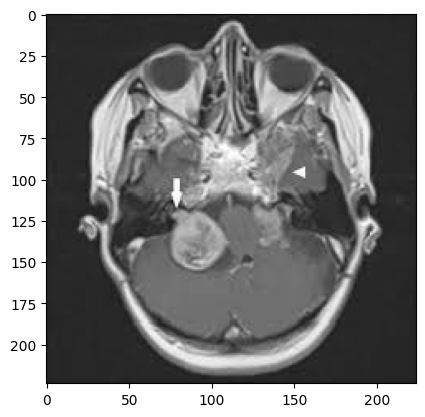

In [ ]:
img_path = '/content/drive/MyDrive/MRI BTD Classification dataset/Testing/meningioma_tumor/image(100).jpg'

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)

plt.show()

In [ ]:
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)
# Add an extra dimension for batch size

In [ ]:
img_array /= 255.0

In [ ]:
prediction = model.predict(img_array)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_class_index = np.argmax(prediction)

In [ ]:
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

predicted_class_label = class_labels[predicted_class_index]

In [ ]:
print("Predicted Class:", predicted_class_label)

Predicted Class: meningioma_tumor


In [ ]:
model.save("/content/drive/MyDrive/MRI_Model_Saved/brain_TransferL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
